## Домашнее задание №3 (курс "Практикум по программированию на языке Python")

### Выполнил: Богданов Александр Иванович, МФТИ, ФПМИ ПМ (ФУПМ)

### Тема: Основы анализа данных и машинного обучения

#### Преподаватель: Мурат Апишев (mel-lain@yandex.ru)

**Выдана**:   27 марта 2023

**Дедлайн**:   21:00 9 апреля 2023

**Среда выполнения**: Jupyter Notebook (Python 3.7+)

#### Правила:

Результат выполнения задания - Jupyter Notebook с кодом и подробными ответами в случае теоретических вопросов. __Максимальное число баллов за задание - 20__.

Все ячейки должны быть "выполненными", при этом результат должен воспроизводиться при проверке (на Python 3.7). Если какой-то код не был запущен или отрабатывает с ошибками, то пункт не засчитывается. Задание, сданное после дедлайна, _не принимается_. Можно отправить недоделанное задание, выполненные пункты будут оценены.

Готовое задание отправляется на почту преподавателя.

Задание выполняется самостоятельно. Если какие-то студенты будут уличены в списывании, все они автоматически получат за эту работу 0 баллов. Если вы нашли в Интернете какой-то специфичный код, который собираетесь заимствовать, обязательно укажите это в задании - наверняка вы не единственный, кто найдёт и использует эту информацию.

Удалять фрагменты формулировок заданий запрещается.

#### Постановка задачи:

- В данной работе нужно решить ряд задач c использованием библиотек для обработки данных и машинного обучения, а также дать ичерпывающие ответы на поставленные вопросы.
- В задачах 1-3 запрещается использовать циклы, генераторы списков и списковые включения, а также функции высшего порядка, необходимо написать тесты, проверяющие работу решения в обычных и крайних случаях.
- Даже если это не указано явно в требованиях, код должен быть по возможности неизбыточным, работать с разумной сложностью и объёмом потребялемой памяти, проверяющие могут снизить балл за задание, выполненное без учёта этого требования.
- Результирующий код должен быть читаемым, с единой системой отступов и адеквантными названиями переменных, проверяющие могут снизить балл за задание, выполненное без учёта этого требования.
- Везде, где это требуется, должны быть отрисованы необходимые графики и даны комментарии и выводы.

__Задание 1 (0.5 балла):__ Проверить, что все элементы входного массива строго положительны.

In [3]:
import numpy as np
def task_1(arr):
    if np.min(arr) <= 0:
        return False
    else:
        return True

In [4]:
#test
arr_1 = np.array([1, 2, 8, 1, 4, 5])
print(task_1(arr_1))

print()

arr_2 = np.array([1, 2, 0, 1, 4, 5])
print(task_1(arr_2))

print()

arr_3 = np.array([1, 2, 8, -1, 4, 5])
print(task_1(arr_3))

True

False

False


__Задание 2 (0.5 балла):__ В векторе повторить все значения `n` раз. Пример: для массива `[1, 2, 3]` и `n` равного 3 ответом должен быть массив `[1, 1, 1, 2, 2, 2, 3, 3, 3]`.

In [5]:
def task_2(arr, n):
    return np.repeat(arr, repeats=n, axis=0)

In [6]:
#test

arr_1 = np.array([1, 2, 3])
print(task_2(arr_1, 3))

print()

arr_2 = np.array([1, 0, 3, -1])
print(task_2(arr_2, 3))

[1 1 1 2 2 2 3 3 3]

[ 1  1  1  0  0  0  3  3  3 -1 -1 -1]


__Задание 3 (1 балл):__ Для векторов `V` и `v` построить вектор, в котором на 0-й позиции будет находиться сумма первых `v[0]` элементов вектора `V`, на 1-й - следующих `v[1]` элементов, и т.д. Гарантируется, что элементов в `V` достаточное количество. Пример: для массивов `V=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]` и `v=[2, 1, 3]` ответом будет `[3, 3, 15]`.

In [7]:
def task_3(V, v):
    helps = np.append([0], np.cumsum(v))
    return list(map(lambda x: sum(V[helps[x - 1] : helps[x]]), range(1, len(helps))))

In [8]:
#test
V=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
v=[2, 1, 3]
print(task_3(V, v))

print()

V=[1, 3, 2, 4, 25, 6, 11, 8, 12, 10]
v=[2, 4, 3]
print(task_3(V, v))

[3, 3, 15]

[4, 37, 31]


Для решения следующих заданий скачайте набор данных 20 News Group с помощью следующего кода:

In [9]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups

X_train = fetch_20newsgroups(subset='train')
X_test = fetch_20newsgroups(subset='test')

label_names = pd.DataFrame(columns=['label_name', 'label_id'],
                           data=[(i, e) for e, i in enumerate(list(X_train.target_names))])
data = pd.DataFrame()
data['text'] = X_train.data + X_test.data
data['is_train'] = [True] * len(X_train.data) + [False] * len(X_test.data)
data['label_id'] = list(X_train.target) + list(X_test.target)

__Задание 4 (1 балл):__ Используя возможности библиотеки pandas

- сделайте join таблиц `data` и `label_names`, удалив из итоговой таблицы поле `label_id`
- посчитайте количество обучающих и тестовых данных
- постройте круговую диаграмму, показывающую долю каждого класса в обучающих данных

In [10]:
data.head()

,text,is_train,label_id
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,True,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,True,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,True,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,True,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,True,14


In [11]:
label_names.head()

,label_name,label_id
0,alt.atheism,0
1,comp.graphics,1
2,comp.os.ms-windows.misc,2
3,comp.sys.ibm.pc.hardware,3
4,comp.sys.mac.hardware,4


In [12]:
#Сделайте join таблиц data и label_names, удалив из итоговой таблицы поле label_id
data_join_label = data.join(label_names.set_index("label_id"), on="label_id").drop(columns="label_id", axis=1)
data_join_label.head()

,text,is_train,label_name
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,True,rec.autos
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,True,comp.sys.mac.hardware
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,True,comp.sys.mac.hardware
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,True,comp.graphics
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,True,sci.space


In [13]:
#Посчитайте количество обучающих и тестовых данных
train, test = data_join_label["is_train"].value_counts()
print(f"Количество обучающих данных: {train}")
print(f"Количество тестовых данных: {test}")

Количество обучающих данных: 11314
Количество тестовых данных: 7532


<AxesSubplot:>

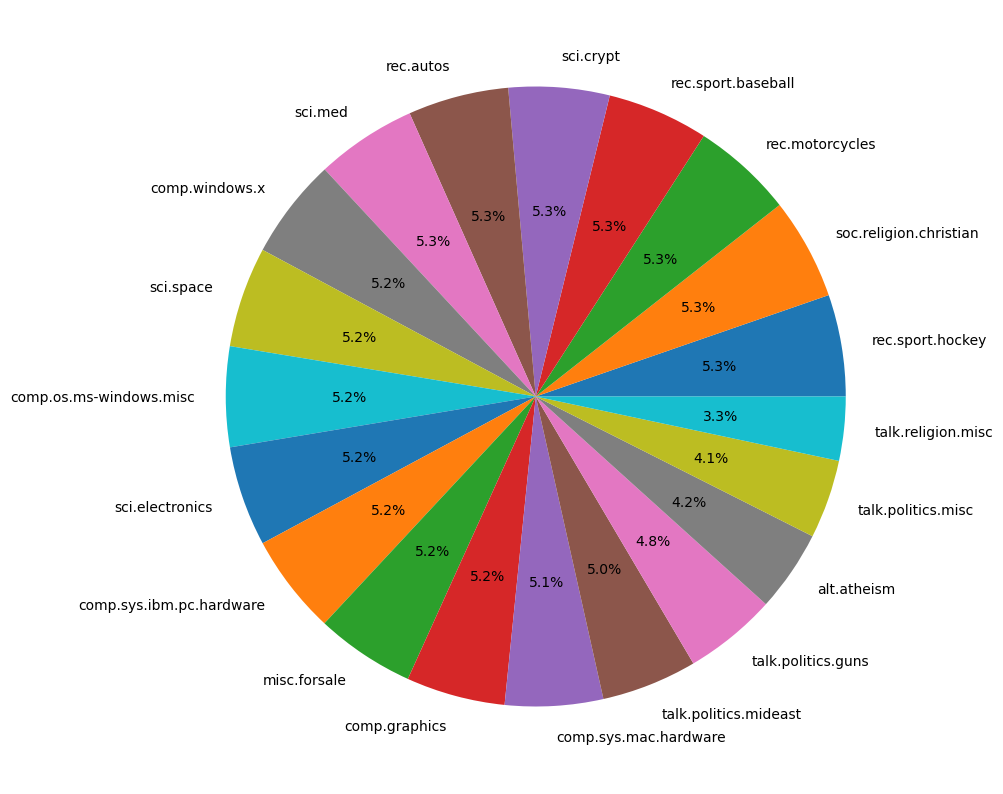

In [561]:
#Постройте круговую диаграмму, показывающую долю каждого класса в обучающих данных
data_join_label[data_join_label["is_train"] == True]["label_name"].value_counts().plot.pie(figsize=(10,20), ylabel="", autopct='%.1f%%')

__Задание 5 (2 балла):__ Каждый объект представляет собой текст. Чаще всего тексты предобрабатывают перед тем, как пытаться выделять из них признаки. Опишите функцию `preprocess`, которая получает на вход сырой текст и возвращает предобработанный. Примените эту функцию к элементу `text` каждого объекта и результат запишите в столбец `pp_text` (далее под текстом подразумевается именно содержимое этого столбца). За пределами `preprocess` циклами пользоваться запрещено (т.е. предобработка должна применяться средствами DataFrame). Функция должна выполнять следующий набор операций:

- привести текст к нижнему регистру
- заменить все символы '\n', '\t' и '\r' на пробелы
- заменить в тексте все символы, не являющиеся английскими буквами, на пробелы
- сделать split текста по пробелам, удалив все пустые слова
- вернуть получившийся список слов

Для ускорения `preprocess` может использовать внешние переменные, например, скомпилированные регулярные выражения.

In [15]:
import re

In [16]:
def preprocess(text):   
    text = text.lower()
    text = re.sub("[^a-z]", " ", text)
    text_split = text.split()
    return text_split

def task_5():
    data_join_label["pp_text"] = data_join_label["text"].apply(preprocess)

In [17]:
#test preprocess
print("Приведение к нижнему регистру")
print("TYTYTfhdmcx")
print(preprocess("TYTYTfhdmcx"))

print()

print("Замена символов")
print("TY\tTYT\rfh\n.dm5 прcx")
print(preprocess("TY\tTYT\rfh\n.dm5 прcx"))

Приведение к нижнему регистру
TYTYTfhdmcx
['tytytfhdmcx']

Замена символов
fh
.dm5 прcx
['ty', 'tyt', 'fh', 'dm', 'cx']


In [18]:
task_5()
data_join_label.head()

,text,is_train,label_name,pp_text
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,True,rec.autos,"[from, lerxst, wam, umd, edu, where, s, my, th..."
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,True,comp.sys.mac.hardware,"[from, guykuo, carson, u, washington, edu, guy..."
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,True,comp.sys.mac.hardware,"[from, twillis, ec, ecn, purdue, edu, thomas, ..."
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,True,comp.graphics,"[from, jgreen, amber, joe, green, subject, re,..."
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,True,sci.space,"[from, jcm, head, cfa, harvard, edu, jonathan,..."


__Задание 6 (2 балла):__ Каждое уникальное слово текста представляет собой признак. Посчитайте, сколько в обучающих текстах есть уникальных слов, отобразите гистограмму частот встречаемости слов в обучающей коллекции, 
отсортировав слова по убыванию частоты встречаемости (по оси X идут все слова из словаря коллекции в порядке убывания частоты встречаемости, по оси Y указываются значения частот).

Для уменьшения признакового пространства словарь фильтруют. Удалите из словаря

- все слова, встречающиеся более 9000-х раз
- все слова, встречающиеся менее 3-х раз
- все слова длиной менее 3 символов
- все слова длиной более 20 символов
- все слова, состоящие из одного и того же символа

Профильтруйте обучающую коллекцию по новому словарю и снова посчитайте число уникальных слов в словаре и снова постройте гистограмму частот.

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

In [436]:
def task_6(filt=False):
    vocabulary = Counter()
    for text in data_join_label[data_join_label["is_train"] == True]["pp_text"]:
        vocabulary.update(text)
    
    if filt == True:
        my_filter = lambda x: (3 <= x[1] <= 9000) and (3 <= len(x[0]) <= 20) and (len(set(x[0])) != 1)
        most_common = dict(filter(my_filter, vocabulary.most_common()))
    else:
        most_common = dict(vocabulary.most_common())
    
    plt.figure(figsize=(10, 10))
    plt.bar(list(most_common.keys())[0:70], list(most_common.values())[0:70])
    plt.xticks(list(most_common.keys())[0:70], list(most_common.keys())[0:70], rotation=90)
    plt.show()
    return most_common

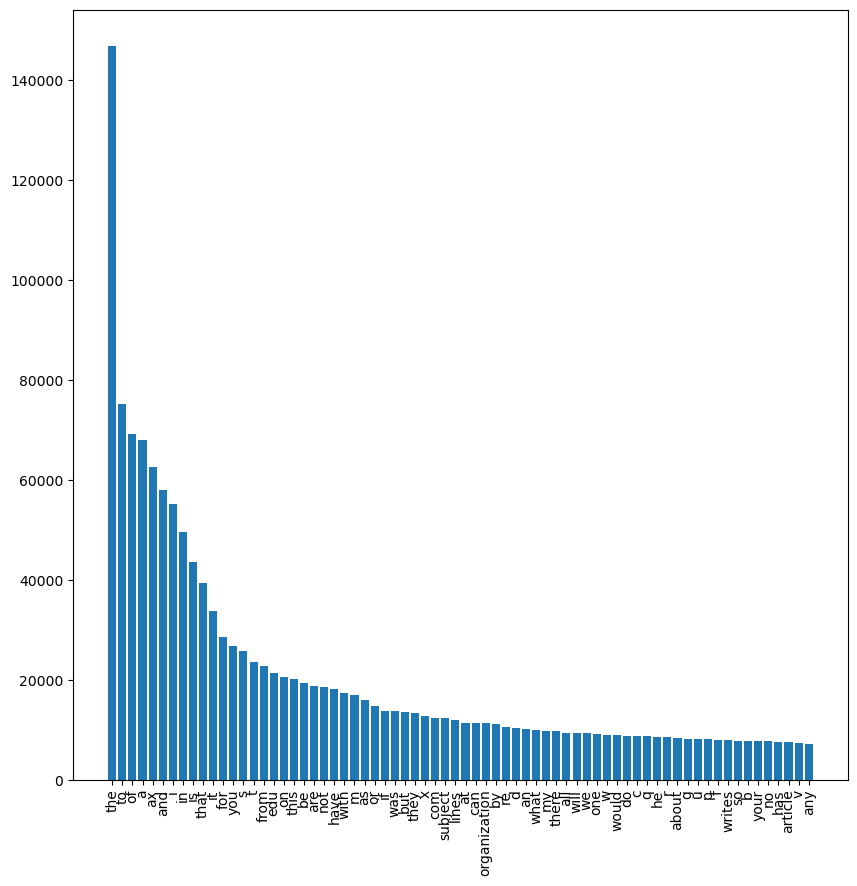

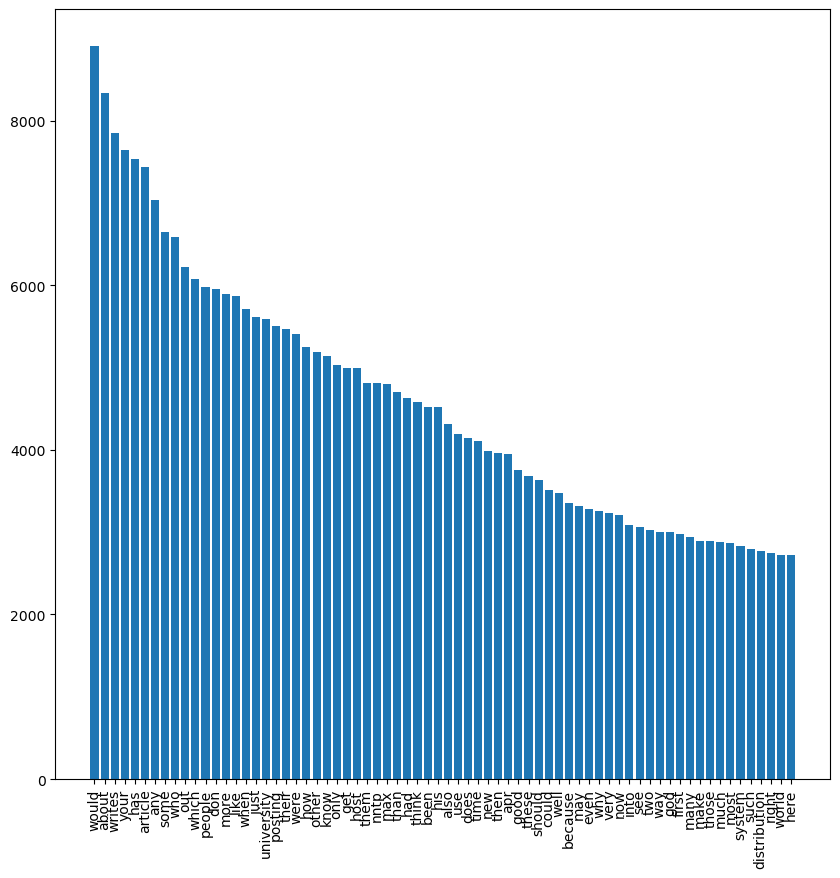

In [440]:
#Гистограмма для первых 70 слов
vocabulary_no_filter = task_6()
vocabulary_filter = task_6(filt=True)

__Задание 7 (1.5 балла):__ Для построения моделей данные нужно перевести в числовой вид. Для этого воспользуйтесь представлением "мешка слов", в котором признаками являются слова, а значениями - частоты их встречаемости в документе. Построить представление мешка слов можно с помощью класса CountVectorizer из sklearn. Подготовьте векторизатор, подав ему обучающие текстовые данные из `data` (приведите тексты к формату входа векторизатора) и полученный выше словарь.

Примените полученный векторизатор к обучающим и тестовым данным, на выходе должны получиться два numpy array (первая размерность - число объектов, вторая - число слов в словаре).

In [461]:
from sklearn.feature_extraction.text import CountVectorizer

def task_7():
    vectorizer = CountVectorizer(vocabulary=vocabulary_filter.keys())
    vectorizer.fit(data_join_label[data_join_label["is_train"] == True]["pp_text"].apply(lambda string: ' '.join(string)))

    X_train = vectorizer.transform(data_join_label[data_join_label["is_train"] == True]["pp_text"].apply(lambda string: ' '.join(string))).toarray()
    X_test = vectorizer.transform(data_join_label[data_join_label["is_train"] == False]["pp_text"].apply(lambda string: ' '.join(string))).toarray()

    assert len(vectorizer.vocabulary_) == len(vocabulary_filter)
    
    return X_train, X_test

In [462]:
X_train, X_test = task_7()

__Задание 8 (1.5 балла):__ Модель логистической регрессии хорошо работает для простых задач классификации текстов, примените её к полученным данным. Для этого настройте модель на обучающих данных, сделайте предсказание для тестовых и измерьте качество с помощью метрик accuracy и F1-score с микро- и макро-усреднением. Попробуйте подобрать оптимальное значение коэффициента регуляризации С с помощью GridSearchCV.

In [487]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV

def task_8():
    y_train = data_join_label[data_join_label["is_train"] == True]["label_name"].values
    y_test = data_join_label[data_join_label["is_train"] == False]["label_name"].values
    
    gscv = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid={"C" : [0.1, 1, 10]})
    gscv.fit(X_train, y_train)
    y_pred = gscv.best_estimator_.predict(X_test)
    
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"F1-score micro: {f1_score(y_test, y_pred, average='micro')}")
    print(f"F1-score macro: {f1_score(y_test, y_pred, average='macro')}")

    return y_pred

In [488]:
y_pred = task_8()

Accuracy: 0.8031067445565587
F1-score micro: 0.8031067445565587
F1-score macro: 0.7968193844691885


__Задание 9 (1.5 балл):__ Ошибки классификации удобно анализировать с помощью матрицы ошибок. Сделав предсказание на тесте постройте и визуализируйте эту матрицу с помощью функции plot_confusion_matrix в двух вариантах: с абсолютными и относительными (нормированными) значеними. Определите классы, которые чаще всего путаются между собой.

In [496]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [503]:
y_train = data_join_label[data_join_label["is_train"] == True]["label_name"].values
y_test = data_join_label[data_join_label["is_train"] == False]["label_name"].values

In [559]:
def task_9():
    fig, ax = plt.subplots(figsize=(20,10))
    disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, xticks_rotation='vertical', ax=ax)
    
    fig, ax = plt.subplots(figsize=(20,10))
    disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, xticks_rotation='vertical', ax=ax, normalize="true", values_format=".2f")

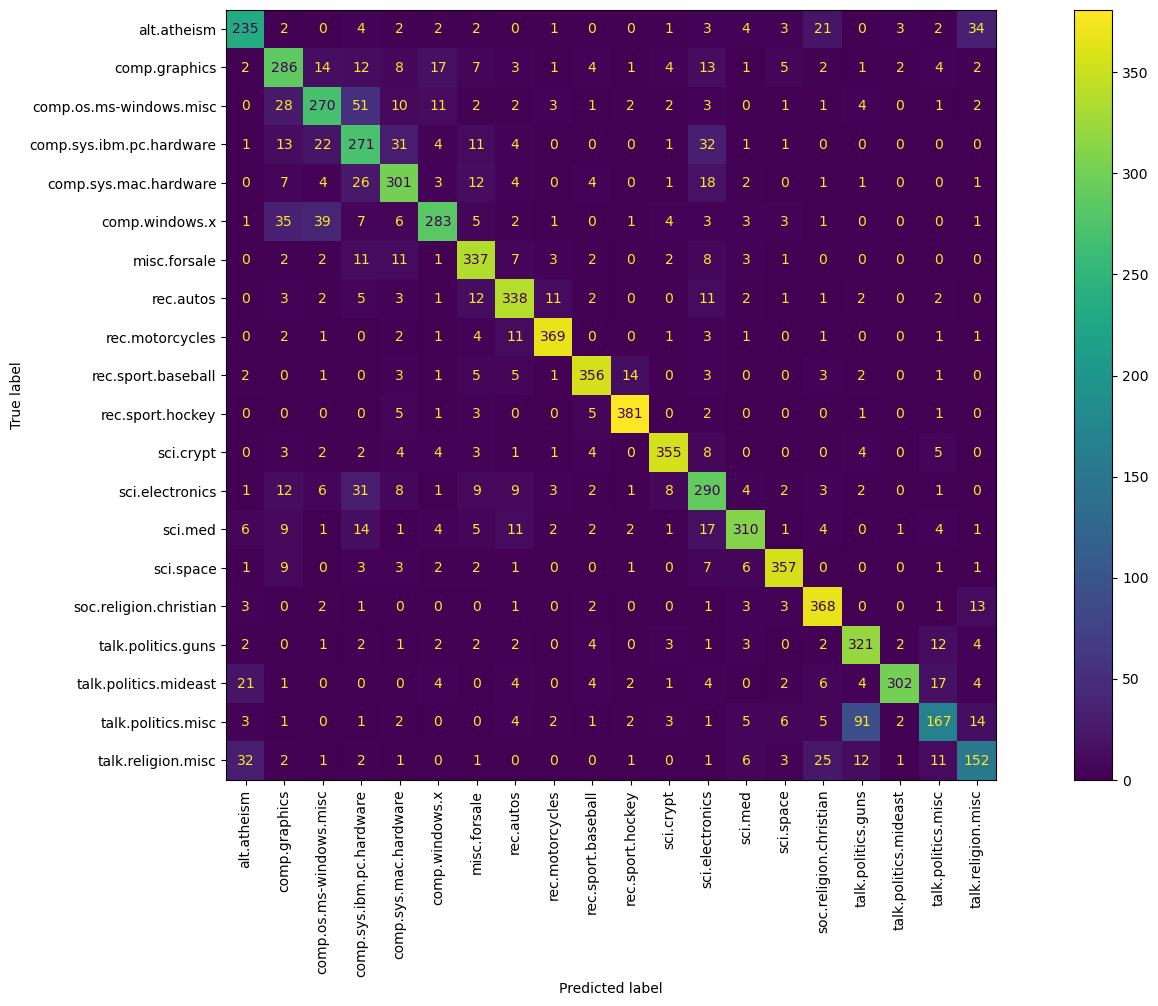

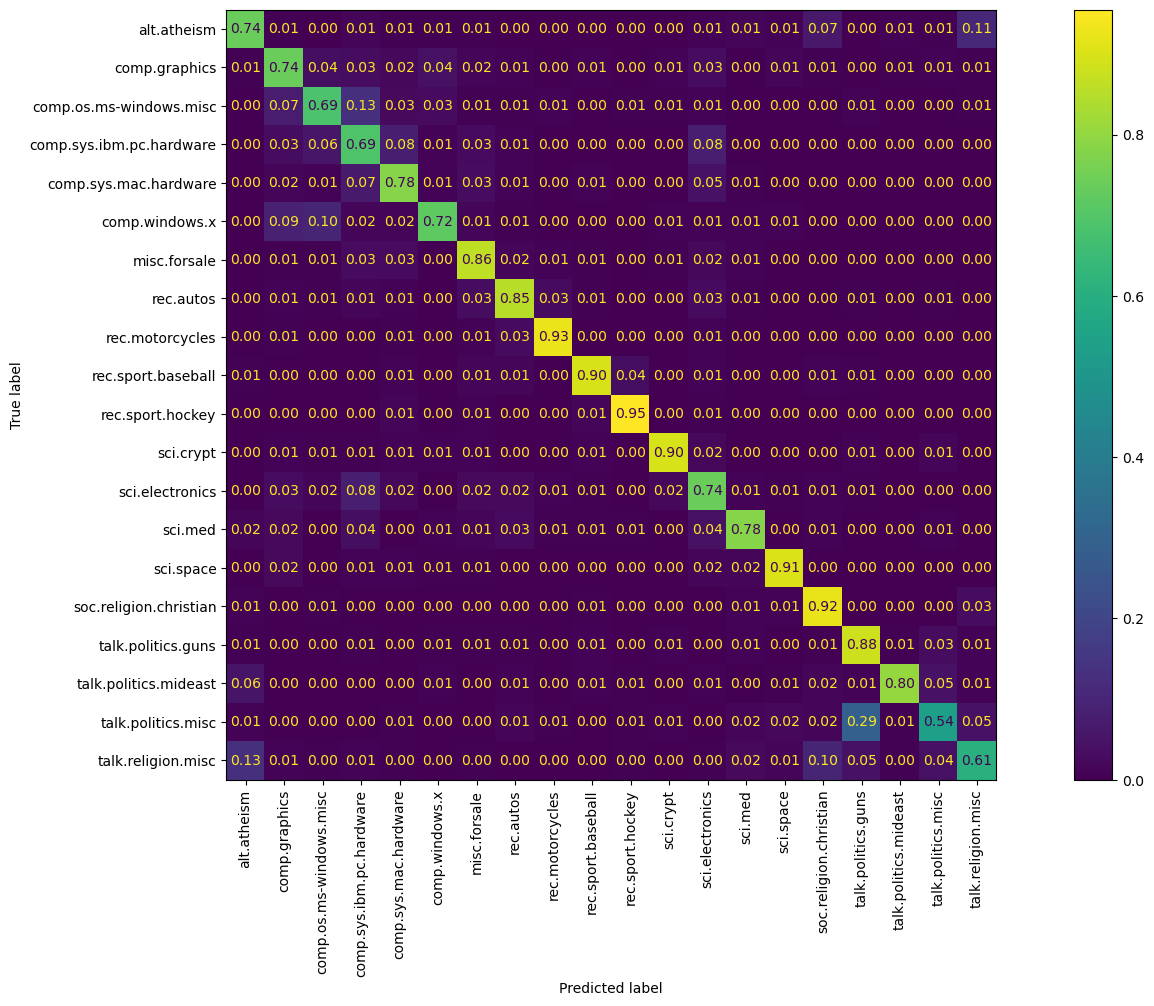

In [560]:
task_9()

Как мы видим чаще всего путаюся talk.politicks.misc и talk.politicks.guns.

__Задание 10 (2.5 балла):__ Установите библиотеку XGBoost и обучите модель градиентного бустинга для решения поставленной задачи классификации. Попробуйте подобрать оптимальную модель, выбрав 2-3 важных параметра обучения. Укажите, какие параметры в большей, а какие - в меньшей степени оказали влияние на итоговое качество модели.

In [570]:
y_train = data[data["is_train"] == True]["label_id"].values
y_test = data[data["is_train"] == False]["label_id"].values

In [571]:
from xgboost import XGBClassifier

In [576]:
def task_10(learning_rate=0.1, max_depth=3, n_estimators=10):
    XGBC = XGBClassifier(learning_rate=learning_rate, max_depth=max_depth, n_estimators=n_estimators)
    XGBC.fit(X_train, y_train)
    y_pred = XGBC.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"F1-score micro: {f1_score(y_test, y_pred, average='micro')}")
    print(f"F1-score macro: {f1_score(y_test, y_pred, average='macro')}")

In [578]:
#test
task_10()

Accuracy: 0.6433882103027084
F1-score micro: 0.6433882103027084
F1-score macro: 0.6568489504666768


In [579]:
#test
task_10(learning_rate=0.3)

Accuracy: 0.6958311205523101
F1-score micro: 0.6958311205523101
F1-score macro: 0.7000021740232936


In [584]:
#test
task_10(learning_rate=0.5)

Accuracy: 0.7107010090281466
F1-score micro: 0.7107010090281466
F1-score macro: 0.7105292270731696


In [580]:
#test
task_10(n_estimators=15)

Accuracy: 0.6583908656399363
F1-score micro: 0.6583908656399363
F1-score macro: 0.6689989618761671


__Задание 11 (3 балла):__ Часто в обработке текстов возникает задача выделения тем, обсуждаемых в них. Одним из способов решения это задачи является кластеризация графа совстречаемостей слов. Для текстов, находящихся в поле `pp_text` постройте словарь "слово" в "слово" в "счетчик совстречаемости", для слова A и B достаточно хранить A -> B -> counter, хранить B -> A -> counter не нужно. Счетчик увеличивается на 1, если пара слов встретилась в одном тексте внутри окна с длиной 10 слов.

In [653]:
def task_11():
    graph = dict()
    for text in data_join_label["pp_text"]:
        for i, A in enumerate(text):
            if i + 10 > len(text) - 1:
                end = text[i + 1: -1]
            else:
                end = text[i + 1: i + 10]
            for B in end:
                if A not in graph.keys():
                    graph[A] = dict()
                if B not in graph[A].keys():
                    graph[A][B] = 1
                else:
                    graph[A][B] += 1
    return graph

In [654]:
graph = task_11()

__Задание 12 (3 балла):__ Приняв каждое слово за вершину, а ребра между ними - за наличие совместной встречаемости, постройте граф совстречаемостей. Все ребра равнозначны, ребро добавляется между словами, если значение счетчика совместной встречамости этих слов выше заданного порога T. Примените к получившему графу алгоритм выделения сообществ greedy_modularity_communities из библиотеки NetworkX и напечайте получившиеся вообщества. Можно ли их как-то интерпретировать?

Пробуйте варьировать значение T от 70 до 120 и удалять слишком большие (и потому заведомо бесполезные) сообщества и сообщества из 1 слова.

In [638]:
from networkx import Graph
from networkx.algorithms import community

In [655]:
def filt(T):
    graph_filt = dict()
    for A, A_dict in graph.items():
        graph_filt[A] = dict()
        for B in A_dict.keys():
            if (B in graph.keys()) and (A in graph[B].keys()) and (graph[A][B] + graph[B][A] >= T):
                graph_filt[A][B] = 1      
            elif graph[A][B] > T:
                graph_filt[A][B] = 1
    return graph_filt


def task_12(T):
    graph = filt(T)
    G = Graph(graph)
    communities = community.greedy_modularity_communities(G)
    communities_filt = [communit for communit in communities if 1 < len(communit) <= 10]
    print(f"{len(communities_filt)} сообществ/а/o при T = {T}")
    for communit in communities_filt:
        print(f"Сообщество: {set(communit)}")

In [656]:
#test
for T in range(70,121,10):
    task_12(T)
    print()

18 сообществ/а/o при T = 70
Сообщество: {'rob', 'liefeld', 'bagged', 'signed'}
Сообщество: {'clinton', 'campaign', 'gore', 'hq'}
Сообщество: {'gif', 'geode', 'ics', 'incoming'}
Сообщество: {'incredible', 'grey', 'keown', 'hulk'}
Сообщество: {'ncsl', 'csrc', 'nist'}
Сообщество: {'theporch', 'gene', 'raider'}
Сообщество: {'bears', 'halat', 'pooh'}
Сообщество: {'panther', 'havok', 'black'}
Сообщество: {'breton', 'cape', 'fredericton'}
Сообщество: {'sg', 'nus'}
Сообщество: {'rider', 'ghost'}
Сообщество: {'cubs', 'suck'}
Сообщество: {'dk', 'aau'}
Сообщество: {'babb', 'sdsu'}
Сообщество: {'kulikauskas', 'jayne'}
Сообщество: {'qualcomm', 'qualcom'}
Сообщество: {'petch', 'gvg'}
Сообщество: {'howl', 'gargle'}

15 сообществ/а/o при T = 80
Сообщество: {'sabretooth', 'punisher', 'appears', 'wolverine', 'hobgoblin'}
Сообщество: {'boyle', 'cactus', 'rider', 'ghost'}
Сообщество: {'bears', 'halat', 'pooh'}
Сообщество: {'incredible', 'keown', 'hulk'}
Сообщество: {'stpl', 'ists'}
Сообщество: {'sg', 'nus